# Give Me Some Credit:

## Exploring Potential Biases in 'MonthlyIncome' and 'NumberOfOpenCreditLinesAndLoans'


## Exploratory Data Analysis and Insights

In [3]:
# Libraries for data reading and manipulation
import pandas as pd
import numpy as np

# Libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Show all columns and their contents
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1) 

In [6]:
# Override scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [57]:
# Show all rows
pd.set_option('display.max_rows', None)

In [7]:
# Create df
df = pd.read_csv("/Users/johnallard/Documents/Semester_2/DATA 6550/HW02/GiveMeSomeCredit-training.csv", index_col=None, header=0)

In [61]:
# Check df
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.77,45,2,0.80,9120.00,13,0,6,0,2.00
1,0,0.96,40,0,0.12,2600.00,4,0,0,0,1.00
2,0,0.66,38,1,0.09,3042.00,2,1,0,0,0.00
3,0,0.23,30,0,0.04,3300.00,5,0,0,0,0.00
4,0,0.91,49,1,0.02,63588.00,7,0,1,0,0.00


In [9]:
# Drop 'Unnamed:0'
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.shape

(150000, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

* There are ~29000 NaN values in 'MonthlyIncome'. This could be the result of bias in the way the data was collected. I'm splitting the dataset into 2 separates dataframes, one with rows including rows with 'MonthlyIncome' values for EDA and modeling, and another with NaN values to explore for any notable differences in the other features.

In [13]:
# For loop to iterate through each column and print their values
for column in df.columns:
    print(f"Values in column '{column}':")
    print(df[column].unique())  
    print()  # Empty line for readability

Values in column 'SeriousDlqin2yrs':
[1 0]

Values in column 'RevolvingUtilizationOfUnsecuredLines':
[0.76612661 0.95715102 0.65818014 ... 0.29974515 0.24604392 0.85028295]

Values in column 'age':
[ 45  40  38  30  49  74  57  39  27  51  46  76  64  78  53  43  25  32
  58  50  69  24  28  62  42  75  26  52  41  81  31  68  70  73  29  55
  35  72  60  67  36  56  37  66  83  34  44  48  61  80  47  59  77  63
  54  33  79  65  86  92  23  87  71  22  90  97  84  82  91  89  85  88
  21  93  96  99  94  95 101  98 103 102 107 105   0 109]

Values in column 'NumberOfTime30-59DaysPastDueNotWorse':
[ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]

Values in column 'DebtRatio':
[0.80298213 0.1218762  0.08511338 ... 0.40429286 0.71656222 0.24990808]

Values in column 'MonthlyIncome':
[ 9120.  2600.  3042. ... 15648.   521.  7647.]

Values in column 'NumberOfOpenCreditLinesAndLoans':
[13  4  2  5  7  3  8  9  6 10 14 22 17  1 15 31 12 21 11 19 18 26 20 23
  0 16 27 29 28 24 25 32 46 33 3

In [14]:
# Create df_new from rows with NaN values in MonthlyIncome
df_NaN = df[df['MonthlyIncome'].isna()]

In [15]:
# Check numerical column stats
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


In [16]:
df_NaN.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29731.00,29731.00,29731.00,29731.00,29731.00,0.00,29731.00,29731.00,29731.00,29731.00,25807.00
mean,0.06,6.65,56.36,0.58,1673.40,NaN,7.22,0.48,0.87,0.45,0.32
std,0.23,217.81,15.44,6.26,4248.37,NaN,4.84,6.25,1.03,6.24,0.81
min,0.00,0.00,21.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.02,46.00,0.00,123.00,NaN,4.00,0.00,0.00,0.00,0.00
50%,0.00,0.08,57.00,0.00,1159.00,NaN,6.00,0.00,1.00,0.00,0.00
75%,0.00,0.44,67.00,0.00,2382.00,NaN,10.00,0.00,1.00,0.00,0.00
max,1.00,22198.00,109.00,98.00,329664.00,NaN,45.00,98.00,23.00,98.00,9.00


In [17]:
df_monthlyincome = df.dropna(subset=['MonthlyIncome'])

## Monthly Income Analysis

In [19]:
# 'MonthlyIncome' stats
print("With All Customers")
df_monthlyincome['MonthlyIncome'].describe()

With All Customers


count   120269.00 
mean    6670.22   
std     14384.67  
min     0.00      
25%     3400.00   
50%     5400.00   
75%     8249.00   
max     3008750.00
Name: MonthlyIncome, dtype: float64

* The max monthly income is $3,008,750. This is a monthly income significantly higher than the average annual income for an American and is an indicator there was bias in the data collection.

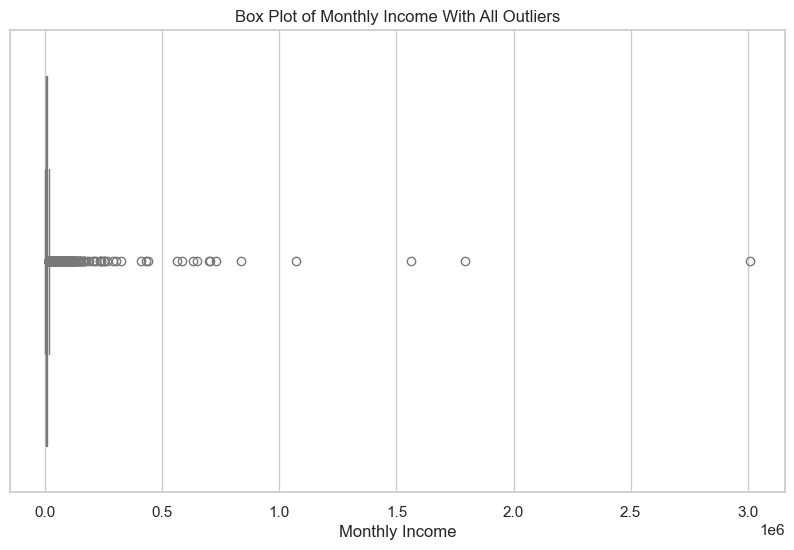

In [21]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a box plot 
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_monthlyincome['MonthlyIncome'], color='lightblue')

# Show the plot
plt.title('Box Plot of Monthly Income With All Outliers')
plt.xlabel('Monthly Income')
plt.show()

* there are a significant number of customers with monthly incomes over $100,000 a month. No information is available regarding how the data was collected, but given how many people have monthly incomes well above the average annual income in the country, the researchers appear to have used biased collection methods.

In [23]:
# Drop all rows with a 'MonthlyIncome' over $100,000
df_monthlyincome = df_monthlyincome[df_monthlyincome['MonthlyIncome'] <= 100000]

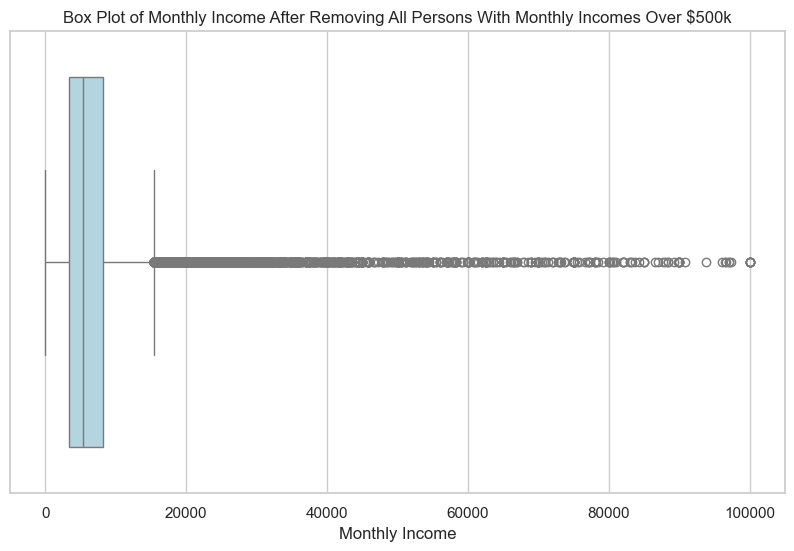

In [24]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a box plot 
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_monthlyincome['MonthlyIncome'], color='lightblue')

# Show the plot
plt.title('Box Plot of Monthly Income After Removing All Persons With Monthly Incomes Over $500k')
plt.xlabel('Monthly Income')
plt.show()

* There's still a significant number of customers who earn more than $20,000 a month. After research statistics on income distribution in the USA, the distribution appears to be normal for a sample size of ~129,000. I'll leave the remaining outliers for EDA and modeling.

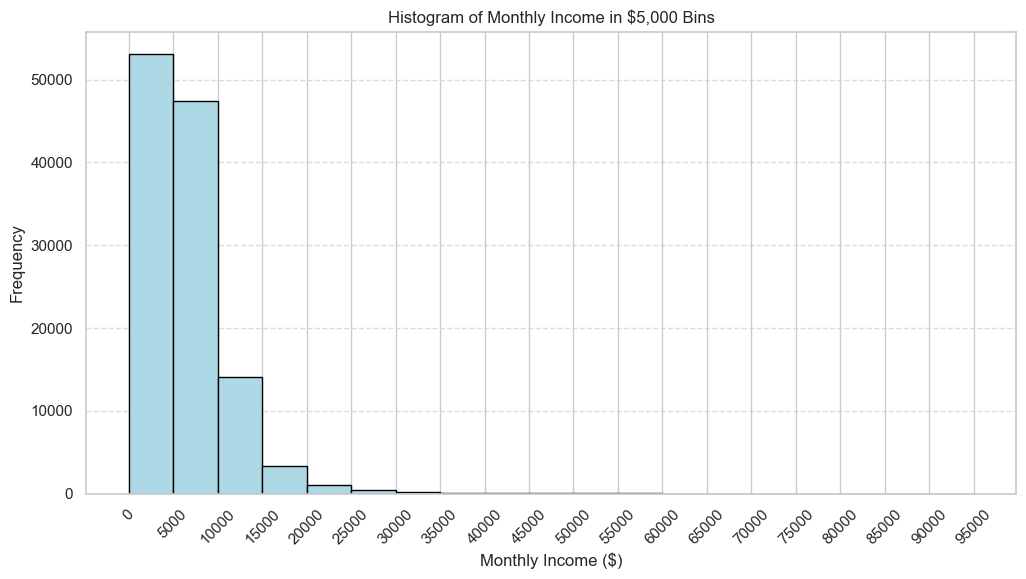

In [26]:
# Assign the bin range
bins = range(0, 100000, 5000)  

# Plot the histogram 
plt.figure(figsize=(12, 6))
plt.hist(df_monthlyincome['MonthlyIncome'], bins=bins, color='lightblue', edgecolor='black')
plt.title('Histogram of Monthly Income in $5,000 Bins')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Frequency')
plt.xticks(bins, rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
# 'NumberOfOpenCreditLinesAndLoans' stats
print("Outliers Removed")
df_monthlyincome['NumberOfOpenCreditLinesAndLoans'].describe()

Outliers Removed


count   120199.00
mean    8.76     
std     5.17     
min     0.00     
25%     5.00     
50%     8.00     
75%     11.00    
max     58.00    
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

## Number Of Open Credit Lines And Loans Analysis

In [29]:

print(df['NumberOfOpenCreditLinesAndLoans'].describe())


count   150000.00
mean    8.45     
std     5.15     
min     0.00     
25%     5.00     
50%     8.00     
75%     11.00    
max     58.00    
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64


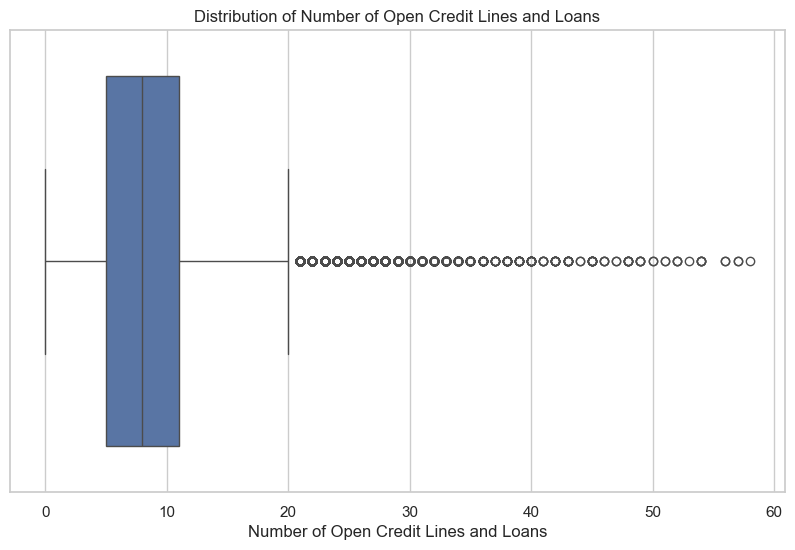

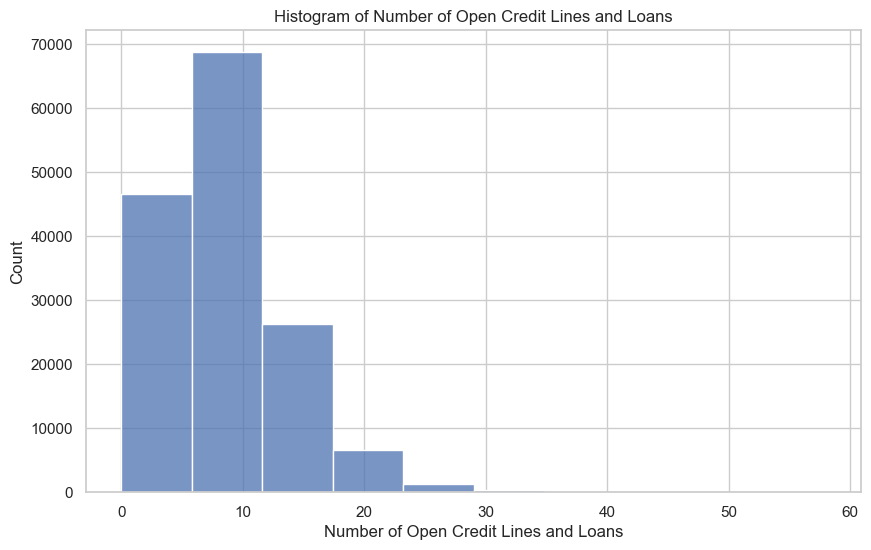

In [30]:

# Create visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['NumberOfOpenCreditLinesAndLoans'])
plt.title('Distribution of Number of Open Credit Lines and Loans')
plt.xlabel('Number of Open Credit Lines and Loans')
plt.show()

# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='NumberOfOpenCreditLinesAndLoans', bins=10)
plt.title('Histogram of Number of Open Credit Lines and Loans')
plt.xlabel('Number of Open Credit Lines and Loans')
plt.ylabel('Count')
plt.show()


In [31]:
# Check for skewness
skewness = df['NumberOfOpenCreditLinesAndLoans'].skew()
print(f"\
Skewness: {skewness:.2f}")

# Check for outliers using IQR method
Q1 = df['NumberOfOpenCreditLinesAndLoans'].quantile(0.25)
Q3 = df['NumberOfOpenCreditLinesAndLoans'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['NumberOfOpenCreditLinesAndLoans'] < lower_bound) | 
              (df['NumberOfOpenCreditLinesAndLoans'] > upper_bound)]
print(f"\
Number of outliers: {len(outliers)}")
print(f"Outlier threshold: < {lower_bound:.2f} or > {upper_bound:.2f}")

Skewness: 1.22
Number of outliers: 3980
Outlier threshold: < -4.00 or > 20.00


There seems to be significant imbalances in the demographics of who takes out loans from the bank. We don't have any information on how the data was collected, if it was collected from a series of banks, there was some bias in how the customers were selected. 

The maximum monthly income is $3,008,750, far exceeding U.S. norms, indicating bias in data collection. And Even after removing the outliers, a large number of customers earn over $20,000 monthly and even $100,000 monthly. The skewness appears in the number of credit lines and loans, as well. The mean number of credit lines is 8.76, however, the highest number of credit lines and loans in the dataset is 58.

If this data was collected from a single bank, the demographics of the area are most likely what's causing the dispropartionality high amount monthly incomes and number of credit lines. The bias of having an abnormally high amount of wealthy individuals and training a model on this dataset could lead to predicted delinquency based on ordinary financial decisions. Ffor example, misinterpreting multiple credit lines as financial risk rather than standard practice for high-income individuals. 